In [ ]:
import pickle
#unpickle the files
with open(r"/content/images.p",'rb') as f:
  images=pickle.load(f)

with open(r"/content/labels.p",'rb') as f:
  labels=pickle.load(f)


In [ ]:
print(images.shape)
print(labels.shape)

(253, 100, 100)
(253,)


In [ ]:
set(labels)

{'No', 'Yes'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
#Label setting
set(labels)

{0, 1}

In [ ]:
#To Know the label transformation indication
import numpy as np
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons:  2
0 --> No
1 --> Yes


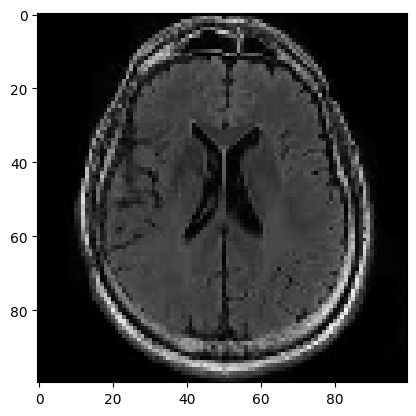

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[45],cmap=plt.get_cmap("gray"))
plt.show()

In [ ]:
#RESHAPE THE IMAGE
import cv2
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [ ]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (253, 100, 100, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
categories = labels.shape[1]
print(categories)

2


In [ ]:
#checking length of images and labels
print(len(images))
print(len(labels))

253
253


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(202, 100, 100, 1)
(51, 100, 100, 1)
(202, 2)
(51, 2)


In [ ]:
#model building

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(100,100,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation("sigmoid"))

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Model History
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=False)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.5540 - loss: 0.6882 - val_accuracy: 0.7059 - val_loss: 0.5902
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5700 - loss: 0.6772 - val_accuracy: 0.7059 - val_loss: 0.5471
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6271 - loss: 0.6508 - val_accuracy: 0.7451 - val_loss: 0.4916
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6955 - loss: 0.6479 - val_accuracy: 0.7647 - val_loss: 0.4733
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6854 - loss: 0.6006 - val_accuracy: 0.7843 - val_loss: 0.4286
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7099 - loss: 0.6084 - val_accuracy: 0.8039 - val_loss: 0.4668
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7243 - loss: 0.5403 - val_accuracy: 0.7647 - val_loss: 0.4106
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7780 - loss: 0.5192 - val_accuracy: 0.8235 - val_los

In [ ]:
model.save('BrainTumor.h5')


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,313,576 (5.01 MB)

 Trainable params: 437,858 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 875,718 (3.34 MB)

Text(0.5, 0, 'epoch')

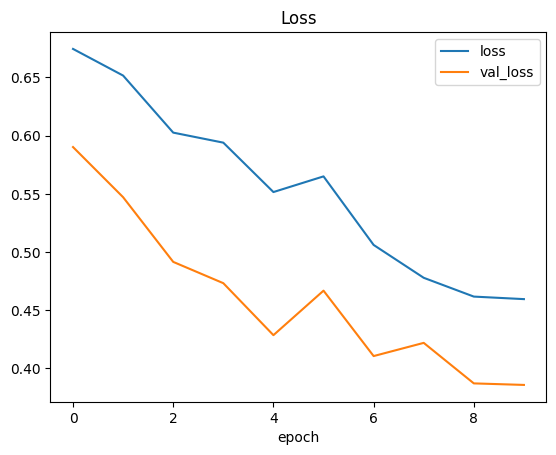

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

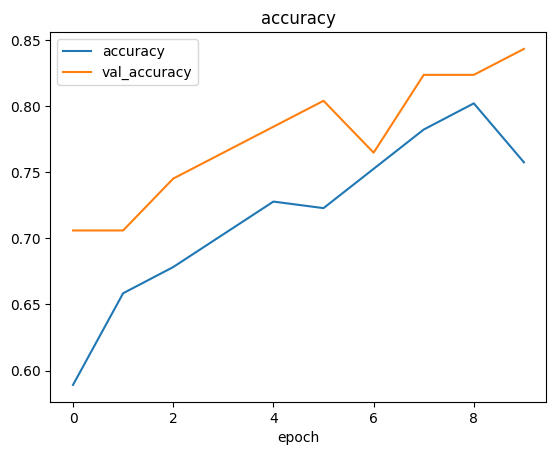

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[45].reshape(1,100,100,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


In [ ]:
features.shape

(1, 98, 98, 32)

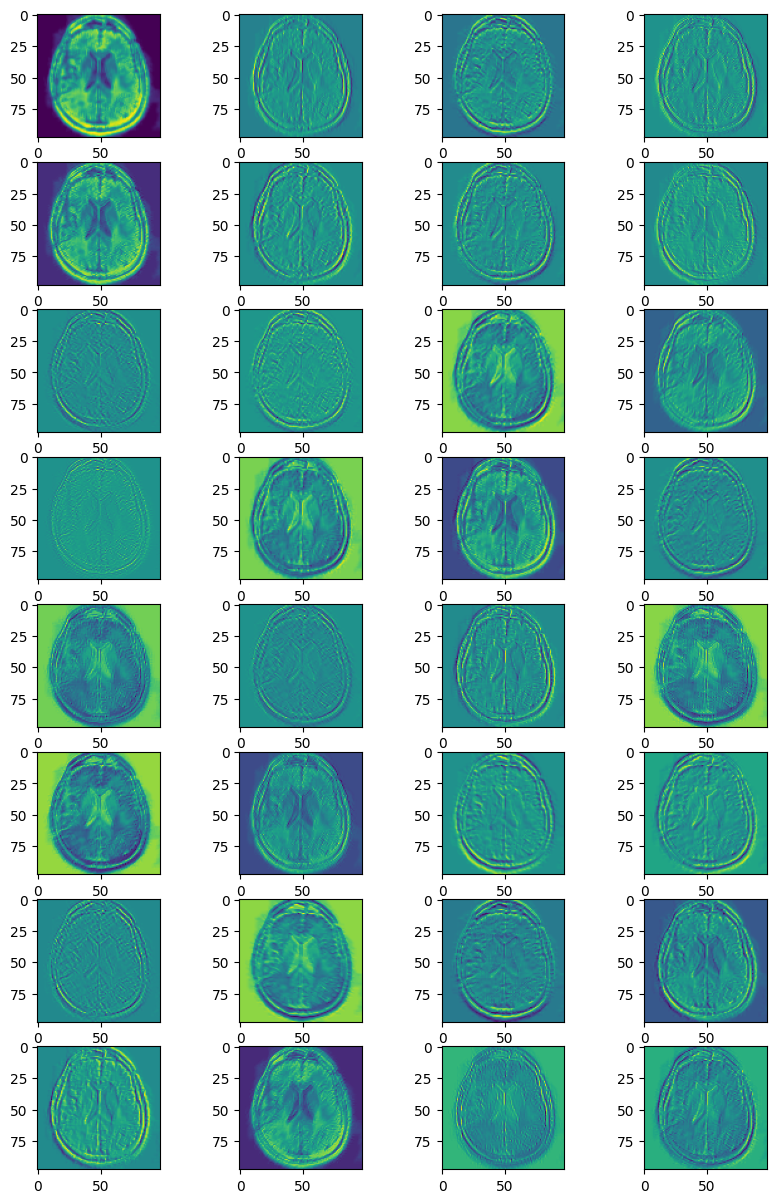

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
d=list(upload.keys())[0]

[255 216 255 ...  65 255 217]


<ipython-input-35-07f70f538c4e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


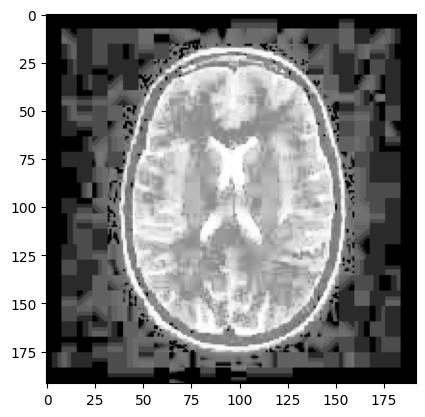

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
#RESIZing The Image
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)


In [ ]:
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np
model=load_model("BrainTumor.h5")

In [ ]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[[0.40400088 0.6440752 ]]


In [ ]:
prediction=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
p=np.argmax(prediction,axis=1)
p

array([0])

In [ ]:
if p==0:
  print("THIS PERSON DOES NOT HAVING A BRAIN TUMOR")
else:
  print("THIS PERSON HAVING BRAIN TUMOR")

THIS PERSON DOES NOT HAVING A BRAIN TUMOR
